<h1> Pandas Calismalari</h1>


<h2> Series Olusturma</h2>

In [7]:
import pandas as pd
import numpy as np # ilgili kütüphaneler dahil edilir.

series=pd.Series(["Mehmet","Kerem","Serra","Eray","Eymen","Elif","Ayşe"]) # degerler girilir.
series.index=["bir","iki","üç","dört","beş","alti","yedi"] # isimler eklenir.
series.name="pandas calismasi"
series
series.values # degerleri görebiliriz.

array(['Mehmet', 'Kerem', 'Serra', 'Eray', 'Eymen', 'Elif', 'Ayşe'],
      dtype=object)

In [13]:
series_2=pd.Series({1:"Adana",2:"Adiyaman",3:"Afyon",4:"Agri",5:"Antalya",6:"Ankara"}, name="Turkiye il plakalari")
series_2.index=["1.il","2.il","3.il","4.il","5.il","6.il"]
series_2

1.il       Adana
2.il    Adiyaman
3.il       Afyon
4.il        Agri
5.il     Antalya
6.il      Ankara
Name: Turkiye il plakalari, dtype: object

<h2>Dataframe calismalari</h2>


In [140]:
df=pd.read_csv('data.csv') #csv dosyasini dahil ettik  (referance: w3schools data.csv)
print(csv_vals.to_string()) #tüm verileri görebiliriz.
df.head() # ilk 5 veri gösterilir,icine sayi girerek istedigimiz miktarda gösterebiliriz.
df.head(2)
"------------------"
df.tail(3) #default olarak son 5 veriyi gösterir ama 3 girdigimiz icin 3 adet gösterecek
"------------------"
df.columns #sütunları gösterir
df.columns=["süre","nabiz","max_nabiz","kalori"] #sütunlara yeni isim vermek,rename() ile de yapılabilir.

"------------------"
df.info() # bilgileri gösterir
df.describe() # detaylı olarak bilgileri bize sunar.
"------------------"
df["süre"] # sadece süre ile ilgili sütunu gösterir.
df.iloc[0:20] #1'den 20'ye kadar değerleri gösterir.
df.loc[2] #2.satirdaki degerleri gösterir.

"------------------"
df.mean() #ortalama hesaplar
df.std() #standart sapma
df.mode() #modu bulur
df.median() #medyanı bulur
df.var() #varyansı bulur

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
5          60    102       127     300.0
6          60    110       136     374.0
7          45    104       134     253.3
8          30    109       133     195.1
9          60     98       124     269.0
10         60    103       147     329.3
11         60    100       120     250.7
12         60    106       128     345.3
13         60    104       132     379.3
14         60     98       123     275.0
15         60     98       120     215.2
16         60    100       120     300.0
17         45     90       112       NaN
18         60    103       123     323.0
19         45     97       125     243.0
20         60    108       131     364.2
21         45    100       119     282.0
22         60    130       101     300.0
23         45   

süre          1789.285714
nabiz          210.547619
max_nabiz      270.616793
kalori       70958.261377
dtype: float64

In [141]:
df.loc[df["süre"]>60 ,"süre"] #sürenin 60'dan büyük değerlerini bize getirir.

df["nabiz"]<150 # bu şarta göre true ya da false değerlerini döndürür.

df[["yeni_max_nabiz","yeni_nabiz"]]=df[["max_nabiz","nabiz"]]-[10 , 5] #ayni anda sirasiyla 10 ve 5 değerlerini çıkardık ve yeni sütun olusturduk

df[["yeni_max_nabiz","yeni_nabiz"]][0:10] #yeni sütunumuzun ilk 10 değerini görüyoruz.

df["nabiz_farki"]=df["max_nabiz"]-df["nabiz"] #yeni sütunumuzu sütunlar arasi işlem yaparak da oluşturabiliriz.
"--------------------------------"
df.drop(["nabiz_farki"],axis=1) # şimdi de sildik fakat kalıcı olarak silmez bunun için inplace=True demeliyiz.
df["nabiz_farki"].size # boyutunu gösterir.
df["nabiz_farki"].shape # biçimini gösterir. 

df["new_vals"]= 0
for i in range(pd.options.display.max_rows):
    df["new_vals"]+= i # yeni sütun ekledik ve tüm değerleri ayni oldu.
df
df.drop("new_vals",axis=1,inplace=True) #kalici bir sekilde silinir. axis=1 olması tüm sütun boyunca siler.
df

,süre,nabiz,max_nabiz,kalori,yeni_max_nabiz,yeni_nabiz,nabiz_farki
0,60,110,130,409.1,120,105,20
1,60,117,145,479.0,135,112,28
2,60,103,135,340.0,125,98,32
3,45,109,175,282.4,165,104,66
4,45,117,148,406.0,138,112,31
...,...,...,...,...,...,...,...
164,60,105,140,290.8,130,100,35
165,60,110,145,300.0,135,105,35
166,60,115,145,310.2,135,110,30
167,75,120,150,320.4,140,115,30


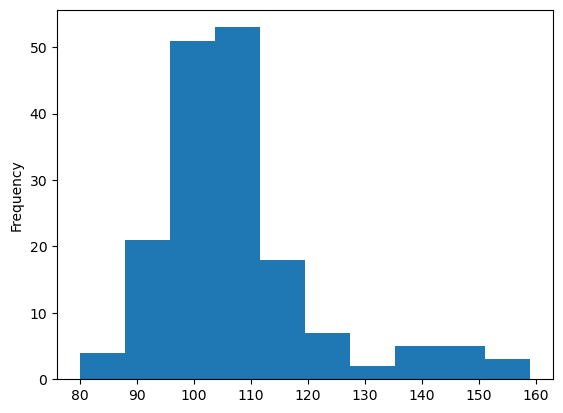

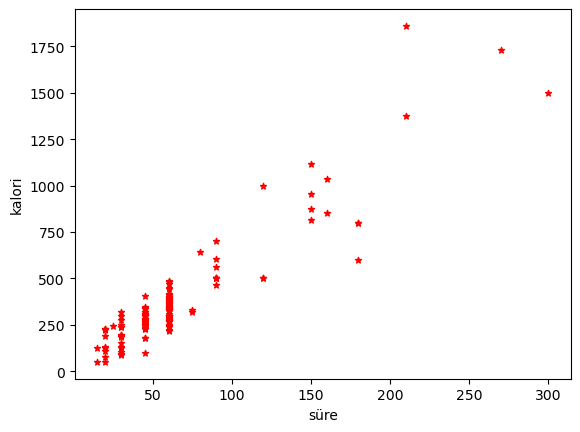

In [160]:
import matplotlib.pyplot as plt #grafik çizdirmek istersek de bu kütüphaneyi dahil etmemiz gerekir.
import pandas as pd
df["nabiz"].plot(kind="hist") #histogram olarak çizdirdik
df.plot(kind='scatter',x='süre',y="kalori",marker="*",color="red") #scatter olarak , kırmızı renkli ve yıldız şeklinde yapar.
plt.show() 

<h3>veri temizleme</h3>


In [197]:
a=pd.isnull(pd.DataFrame({"Sütun 1":[16,np.nan,37,55,23,np.nan,82],'Sütun 2':[np.nan,34,43,11,np.nan,90,23]}))
#yukarıdaki örnek ile boş olup olmadığını kontrol ediyoruz.

seriess=pd.Series([1,np.nan,3,np.nan,np.nan])
seriess[seriess.notnull()].sum() # null değerlere yönelik filtreleme yapar ve toplar.

"------------------------------"

seriess.dropna() # boş hücreler silindi fakat inplace=True verilmezse kalıcı silmez!


seriess.fillna(1) #boş hücrelere fillna() ile 1 değeri atandı ancak kalıcı değil çünkü inplace değeri verilmedi.

s=seriess.mean()
seriess.fillna(s,inplace=True) #burada ise hücrelerin ortalamasını hesapladıktan sonra o değeri boş hücrelere atanması sağlandı ve kalıcı şekilde oldu.
seriess
"------------------------------"

df_2 = pd.DataFrame({
    'Column A': [53, np.nan, 30,45,np.nan,90,99],
    'Column  B': [20, np.nan, 31,np.nan,np.nan,32,np.nan],
    'Column  C': [np.nan, 56, 100,43,12,54,np.nan]
})

df_2.dropna(how='any') #oluşturduğumuz yeni veri setinde boş değerleri how='any' ile silmiş olduk.
df_2.fillna(method='ffill') #boş değerleri method='ffill' ile önceki değerlerle doldurmuş olduk.
df_2.fillna(method='bfill') # bu sefer ise kendisinden sonraki veriler ile doldurduk. Son değer NaN kalır.

,Column A,Column B,Column C
0,53.0,20.0,56.0
1,30.0,31.0,56.0
2,30.0,31.0,100.0
3,45.0,32.0,43.0
4,90.0,32.0,12.0
5,90.0,32.0,54.0
6,99.0,NaN,NaN


In [210]:
new_df=pd.DataFrame([1,2,3,4,5,3,2,2,9],index=["bir","iki","üç","dört","beş","alti","yedi","sekiz","dokuz"])
new_df.duplicated() #tekrarlı veri var mı yok mu diye kontrol eder.
new_df.duplicated(keep=False) #keep=False ile bütün değerleri getirir.
new_df.duplicated(keep='first') #tekrarlı verileri başa getirerek gösterir.
new_df.drop_duplicates() #bu metot ile tekrar eden verileri silebiliriz eğer inplace=True yazmazsanız kalıcı silmez.

,0
bir,1
iki,2
üç,3
dört,4
beş,5
dokuz,9
